# Project 1
## Test a Perceptual Phenomenon : Stroop Effect

In [101]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

You can find the dataset by clicking on this [link](https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&usg=AFQjCNGAjbK9VYD5GsQ8c_iRT9zH9QdOVg)

In [102]:
data=pd.read_csv('stroopdata.csv')
data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [103]:
print "Number of participants:", len(data)

Number of participants: 24


### Question 1: What is our independent variable? What is our dependent variable?

The independent variable is the two conditions: a congruent word condition and an incongruent word condition.

The dependent variable is: the time it takes to name the ink colors in equally-sized lists

### Question 2:  What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The null hypothesis could be: there is no difference in the population mean time to read the color list between the congruent group and the incongruent group.

Alternative hypothesis: the population mean time to read the color list is different between the congruent group and the incongruent group.

Each participant will go through and record a time from each condition. So we should perform a dependent t-test for paired samples (two samples, two-tail). 

### Question 3: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

To measure the central tendency we can use the mean:

In [104]:
Xc=data.Congruent.mean()
print 'Mean of the time to read for the Congruent group: ', Xc

Xinc=data.Incongruent.mean()
print 'Mean of the time to read for the Incongruent group: ', Xinc

Mean of the time to read for the Congruent group:  14.051125
Mean of the time to read for the Incongruent group:  22.0159166667


However the mean can be affected by outliers that’s why it’s interesting to compute the median:

In [105]:
Median_c=data.Congruent.median()
print 'Median of the time to read for the Congruent group: ', Median_c
Median_Inc=data.Incongruent.median()
print 'Median of the time to read for the Incongruent group: ', Median_Inc

Median of the time to read for the Congruent group:  14.3565
Median of the time to read for the Incongruent group:  21.0175


To measure the variability of the dataset, we can use standard deviation:

In [106]:
Std_c=data.Congruent.std()
print 'Standard deviation of the time to read for the Congruent group: ', Std_c
Std_inc=data.Incongruent.std()
print 'Standard deviation of the time to read for the Incongruent group: ', Std_inc

Standard deviation of the time to read for the Congruent group:  3.55935795765
Standard deviation of the time to read for the Incongruent group:  4.79705712247


### Question 4:  provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

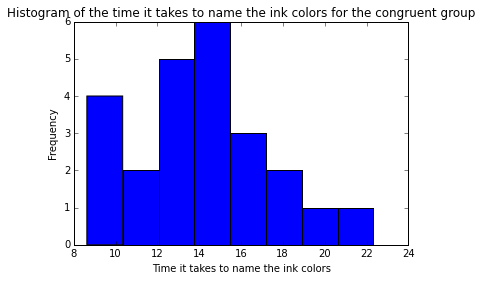

In [107]:
plt.hist(data.Congruent,bins=8)
plt.title('Histogram of the time it takes to name the ink colors for the congruent group')
plt.ylabel('Frequency')
plt.xlabel('Time it takes to name the ink colors')
plt.show()

The histogram is centered around 14 seconds with minimum around 9 and maximum around 22.

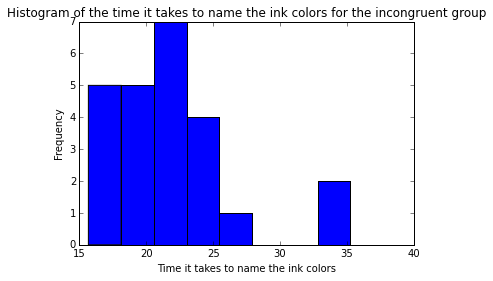

In [108]:
plt.hist(data.Incongruent,bins=8)
plt.title('Histogram of the time it takes to name the ink colors for the incongruent group')
plt.ylabel('Frequency')
plt.xlabel('Time it takes to name the ink colors')
plt.show()

The histogram is centered around 23 seconds and there are outliers around 34 seconds.

### Question 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?


In [109]:
print "The point estimate (Xc-Xinc) is:",Xc-Xinc

The point estimate (Xc-Xinc) is: -7.96479166667


Then we calculate the standard deviation of the difference in time between the congruent condition and the incongruent condition for each individual:

In [110]:
S=(data.Congruent-data.Incongruent).std()
print "S =",S

S = 4.86482691036


So the t-statistic is:

In [111]:
t_statistic=(Xc-Xinc)/(S/sqrt(len(data)))
print "The t_statistic is:",t_statistic

The t_statistic is: -8.02070694411


For alpha= 0.05 so 0.025 for each tail with 23 degree of freedom, t-critical = positive and negative 2.069. The t table can be find [here](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg).

In [112]:
t_critical_negative = - 2.069
t_critical_positive =  2.069

Let's compute the confidence interval:

In [113]:
lower_bound= (Xc-Xinc) + t_critical_negative*(S/sqrt(len(data)))
higher_bound= (Xc-Xinc) + t_critical_positive*(S/sqrt(len(data)))

print "Confidence interval:", "["+str(round(lower_bound,3))+","+ str(round(higher_bound,3))+"]"

Confidence interval: [-10.019,-5.91]


Because t-statistic < -t-critical it means that the t-statistic is in the the critical region so we should reject the null hypothesis. 

So it means that the color of the ink in which the word is printed has an impact on the time it takes to read the list of word.

The result match the expectations as we could anticipate that it takes more time to read the list when the names do not match the colors in which they are printed that may increase errors or confusion to read the list.